In [24]:
from IPython.display import HTML

# Video 1: Hello World

## Embedded player

In [25]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/cKxRvEZd3Mw" frameborder="2" allowfullscreen></iframe>')

## Notes

Classifier - a function that takes data as input and assigns a label as output

Supervised learning - create a classifier by looking for patterns in examples

Basic recipe for suppervised learning:
1. Collect training data
2. Train classifier
3. Make predictions

## Training Data
| Weight | Texture | Label  |
|--------|---------|--------|
| 150 g  | Bumpy   | Orange |
| 170 g  | Bumpy   | Orange |
| 140 g  | Smooth  | Apple  |
| 130 g  | Smooth  | Apple  |

In [26]:
features = [
    [150, "Bumpy"],
    [170, "Bumpy"],
    [140, "Smooth"],
    [130, "Smooth"]
]
labels = ["Orange", "Orange", "Apple", "Apple"]

texture_values = ["Bumpy", "Smooth"]
label_values = ["Orange", "Apple"]

encoded_features = [(weight, texture_values.index(texture)) for weight, texture in features]
encoded_labels = [label_values.index(label) for label in labels]

print(encoded_features)
print(encoded_labels)

[(150, 0), (170, 0), (140, 1), (130, 1)]
[0, 0, 1, 1]


## Code


In [27]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()

# Train classifier
classifier = classifier.fit(encoded_features, encoded_labels)

In [28]:
# Test classifier
print(classifier.predict([[152, 0], [110, 1]]))

[0 1]


# Video 2: Decision Trees

## Embedded player

In [29]:
HTML('<iframe width="800" height="300" src="https://www.youtube.com/embed/tNa99PG8hR8" frameborder="2" allowfullscreen></iframe>')

## Notes
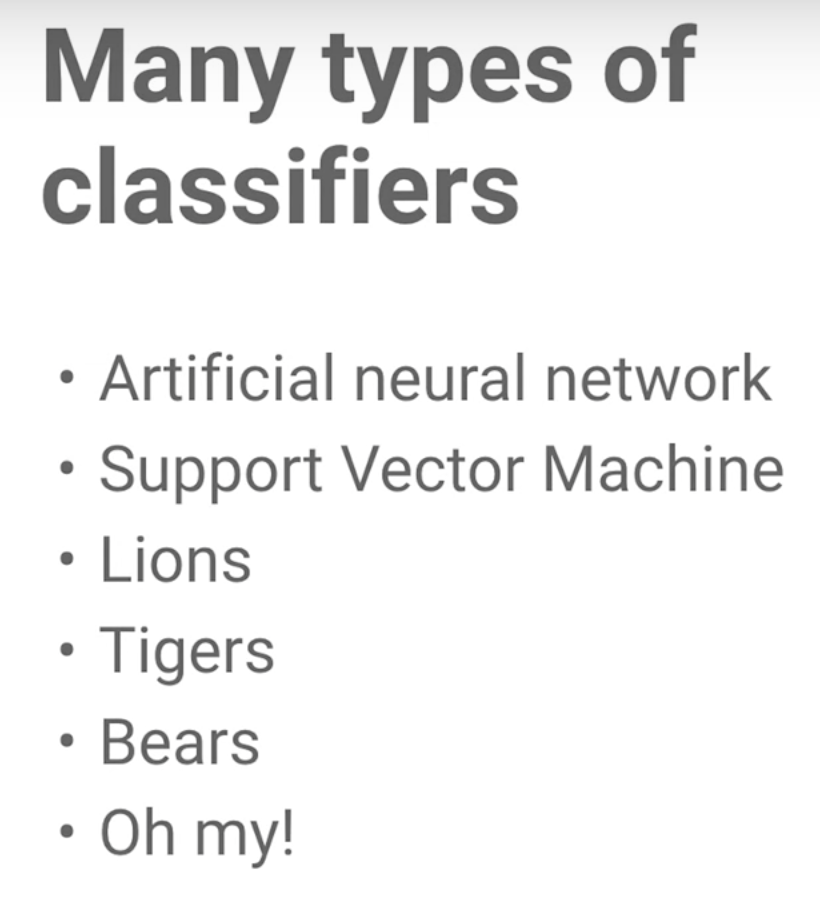

Decision trees are unique because they're easy to read and understand - one of the few interpretable models.

Iris database

## Training Data

In [30]:
from sklearn.datasets import load_iris
from pprint import pprint
iris = load_iris()
pprint((iris.feature_names, iris.target_names))
pprint(list(zip(iris.data, iris.target_names[iris.target])))

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10'))
[(array([ 5.1,  3.5,  1.4,  0.2]), 'setosa'),
 (array([ 4.9,  3. ,  1.4,  0.2]), 'setosa'),
 (array([ 4.7,  3.2,  1.3,  0.2]), 'setosa'),
 (array([ 4.6,  3.1,  1.5,  0.2]), 'setosa'),
 (array([ 5. ,  3.6,  1.4,  0.2]), 'setosa'),
 (array([ 5.4,  3.9,  1.7,  0.4]), 'setosa'),
 (array([ 4.6,  3.4,  1.4,  0.3]), 'setosa'),
 (array([ 5. ,  3.4,  1.5,  0.2]), 'setosa'),
 (array([ 4.4,  2.9,  1.4,  0.2]), 'setosa'),
 (array([ 4.9,  3.1,  1.5,  0.1]), 'setosa'),
 (array([ 5.4,  3.7,  1.5,  0.2]), 'setosa'),
 (array([ 4.8,  3.4,  1.6,  0.2]), 'setosa'),
 (array([ 4.8,  3. ,  1.4,  0.1]), 'setosa'),
 (array([ 4.3,  3. ,  1.1,  0.1]), 'setosa'),
 (array([ 5.8,  4. ,  1.2,  0.2]), 'setosa'),
 (array([ 5.7,  4.4,  1.5,  0.4]), 'setosa'),
 (array([ 5.4,  3.9,  1.3,  0.4]), 'setosa'),
 (array([ 5.1,  3.5,  1.4,  0.3]), 'setosa'),
 (array([ 5.7,

## Testing Data

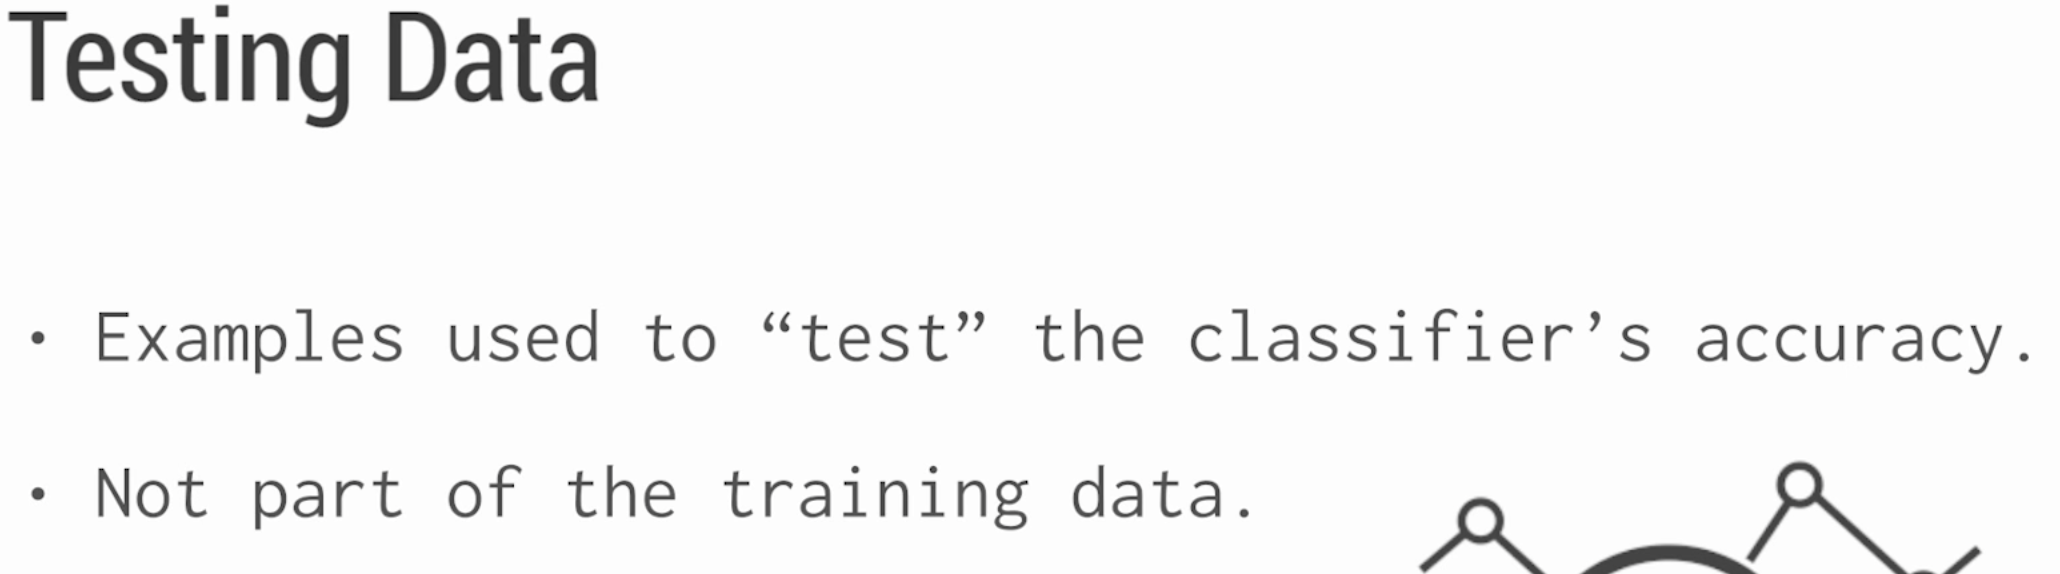

In [31]:
import numpy as np
test_idx = [0, 50, 100]

# training data
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

# testing data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

## Classification

In [32]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()

# Train classifier
classifier = classifier.fit(train_data, train_target)

In [33]:
print(test_target)
print(classifier.predict(test_data))

[0 1 2]
[0 1 2]


## Resulting decision tree

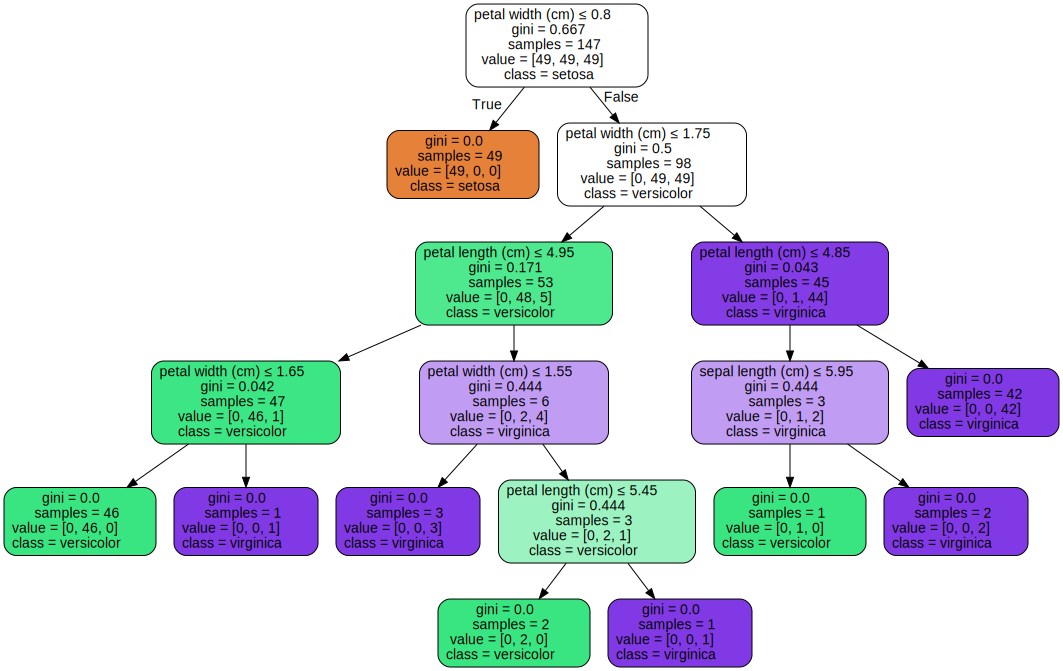

In [34]:
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Video 3: Feature Engineering

## Embedded player

In [35]:
HTML('<iframe width="800" height="315" src="https://www.youtube.com/embed/N9fDIAflCMY" frameborder="0" allowfullscreen></iframe>')

## Notes

A good feature - easy to decide between two different things.

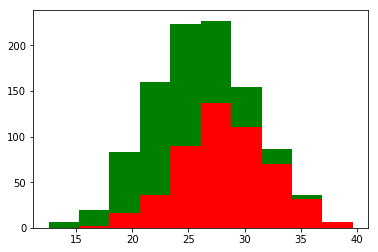

In [43]:
import matplotlib.pyplot as plt

greyhounds = 500
labs = 500

grey_height = 28 + 4 * np.random.randn(greyhounds)
lab_height = 24 + 4 * np.random.randn(labs)

plt.hist([grey_height, lab_height], stacked=True, color=['r', 'g'])
plt.show()

Dangers:
- irrelevant features
- correlated features
- features whose relationship is known rather than showing the relationship (i.e. two points v.s. their distance.

# Video 4: Supervised Learning Pipeline

## Embedded player

In [37]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/84gqSbLcBFE" frameborder="0" allowfullscreen></iframe>')

## Notes

Partitioning datasets into train and test data - to check how good our training data is.

In [38]:
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

print("Train:")
pprint(list(zip(X_train, y_train)))
print("Test:")
pprint(list(zip(X_test, y_test)))


Train:
[(array([ 5.7,  3.8,  1.7,  0.3]), 0),
 (array([ 6.7,  3. ,  5. ,  1.7]), 1),
 (array([ 5. ,  3.4,  1.5,  0.2]), 0),
 (array([ 6. ,  2.7,  5.1,  1.6]), 1),
 (array([ 4.9,  3.1,  1.5,  0.1]), 0),
 (array([ 6.3,  2.5,  4.9,  1.5]), 1),
 (array([ 5.8,  2.7,  5.1,  1.9]), 2),
 (array([ 5.6,  3. ,  4.1,  1.3]), 1),
 (array([ 5.1,  3.8,  1.5,  0.3]), 0),
 (array([ 5. ,  3.3,  1.4,  0.2]), 0),
 (array([ 5.5,  3.5,  1.3,  0.2]), 0),
 (array([ 4.7,  3.2,  1.3,  0.2]), 0),
 (array([ 5.8,  2.7,  4.1,  1. ]), 1),
 (array([ 5.9,  3. ,  5.1,  1.8]), 2),
 (array([ 6.7,  3.1,  4.4,  1.4]), 1),
 (array([ 6.7,  3.3,  5.7,  2.1]), 2),
 (array([ 6.1,  3. ,  4.6,  1.4]), 1),
 (array([ 6.4,  2.8,  5.6,  2.2]), 2),
 (array([ 7.1,  3. ,  5.9,  2.1]), 2),
 (array([ 6.3,  2.5,  5. ,  1.9]), 2),
 (array([ 6.7,  3.1,  4.7,  1.5]), 1),
 (array([ 5.1,  3.4,  1.5,  0.2]), 0),
 (array([ 7.4,  2.8,  6.1,  1.9]), 2),
 (array([ 4.9,  3. ,  1.4,  0.2]), 0),
 (array([ 7.2,  3. ,  5.8,  1.6]), 2),
 (array([ 6.4,  2.